In [4]:
import warnings
warnings.filterwarnings('ignore')
import pyterrier as pt
if not pt.started():
    pt.init()

import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

import glob
import ir_measures
from ir_measures import * # imports all supported measures, e.g., AP, nDCG, RR, P

Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
/tmp/ipykernel_15938/3019505593.py:5: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()


In [11]:
csv = f'/nfs/primary/retrievability-bias/results/new_clustered/Retrievability-Results-main2.csv'
df = pd.read_csv(csv, index_col=0).reset_index()
df = df.rename(columns={'Collection':'gini0', 'Collection.1':'gini30', 'Collection.2':'gini60','Collection.3':'gini90'})
df = df.rename(columns={'MSM-Dev':'ndcg0', 'MSM-Dev.1':'ndcg30', 'MSM-Dev.2':'ndcg60','MSM-Dev.3':'ndcg90'})

In [20]:
df.head()

,Model,gini0,ndcg0,gini30,ndcg30,gini60,ndcg60,gini90,ndcg90
0,BM25,0.4820,0.2132,0.4714,0.2247,0.5019,0.2020,0.5383,0.1109
1,BM25>>Mono-T5,0.4254,0.3951,0.4455,0.3792,0.4740,0.3190,0.5108,0.1554
2,Splade,0.3856,0.4461,0.3960,0.4184,0.4097,0.3474,0.4111,0.1664
3,TCT_ColBERT,0.3902,0.4210,0.4027,0.3969,0.4179,0.3326,0.4386,0.1616
4,BM25>>TCT_ColBERT,0.4323,0.3713,0.4500,0.3571,0.4791,0.3044,0.5162,0.1514


In [25]:
df2 = df.loc[df['Model'] == 'BM25',['gini0','gini30','gini60','gini90']]
df2.iloc[0].to_list()

[0.482, 0.4714, 0.5019, 0.5383]

In [50]:
def sub_plot(plt,ylabel,df,colname):
    x = [0,30,60,90]
    cols = [colname +'0',colname +'30',colname +'60',colname +'90']
    df2 = df.loc[df['Model'] == 'BM25',cols]
    y = df2.iloc[0].to_list()
    line1, = plt.plot(x,y,label='BM25', marker='.')

    df2 = df.loc[df['Model'] == 'BM25>>Mono-T5',cols]
    y = df2.iloc[0].to_list()
    line2, = plt.plot(x,y,label='BM25_monot5', marker='.')

    df2 = df.loc[df['Model'] == 'Splade',cols]
    y = df2.iloc[0].to_list()
    line3, = plt.plot(x,y,label='Splade', marker='.')

    df2 = df.loc[df['Model'] == 'TCT_ColBERT',cols]
    y = df2.iloc[0].to_list()
    line4, = plt.plot(x,y,label='TCT_ColBERT', marker='.')

    df2 = df.loc[df['Model'] == 'BM25>>TCT_ColBERT',cols]
    y = df2.iloc[0].to_list()
    line5, = plt.plot(x,y,label='BM25>>TCT_ColBERT', marker='.')

    # plt.set_title('Exposure Fairness')
    # plt.set_title(title)
    plt.set_xlabel(r'Prune ratio')
    plt.set_ylabel(ylabel)
    plt.set_xticks(ticks = x, labels = ['0', '30', '60', '90'])
    # plt.set_yticks(ticks = y, labels = [f'{i:.2f}' for i in y])
    return line1, line2,line3,line4,line5


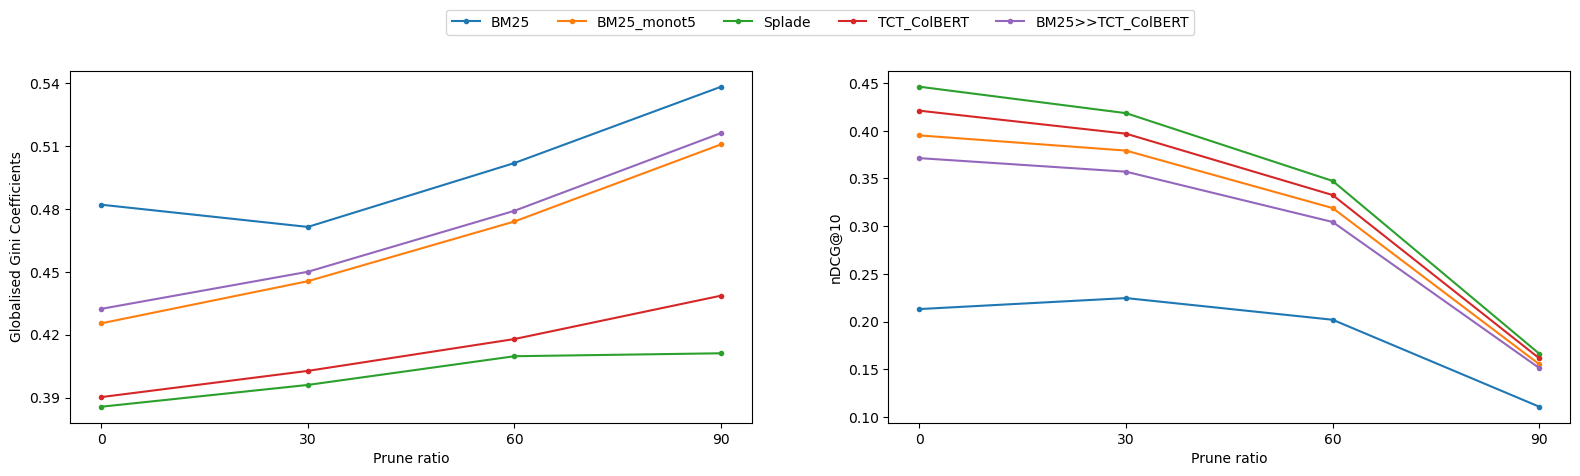

In [51]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
# plt.subplots_adjust(hspace=1, wspace=0.2, left=0.1)
plt.subplots_adjust(hspace=1, wspace=0.2, left=0, right=1, bottom=0)

ax0.xaxis.set_major_locator(MultipleLocator(1))
ax0.yaxis.set_major_locator(MultipleLocator(0.03))
# ax0.set_xlim(1,5)
# ax0.set_ylim(0.22,0.30)
g0 = sub_plot(ax0,'Globalised Gini Coefficients',df,'gini')

ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(0.05))
# ax1.set_xlim(1,5)
# ax1.set_ylim(0.22,0.32)
g1 = sub_plot(ax1,'nDCG@10',df,'ndcg')

# g = list(g0 + g1)

fig.legend(handles=g0, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=10)
filename = f'gini_globalised.pdf'
plt.savefig(f'./results/new_clustered/{filename}', format="pdf", bbox_inches="tight", pad_inches=0)
plt.show()